## WEATHER STATISTICS PROJECT
##### MEMBERS : ESPINOUX Jules, FALCOZ Nils, GRUNEWALD Augustin, PICQ Florian

#### 1 - INTRODUCTION TO DATA - NUMERICAL & GRAPHICAL SUMMARIES

In this introduction part we're going to study the dataset, the different categories, size of the set, ... 

In [35]:
data_weather <- read.table("data/donnees-synop-essentielles-omm.csv",
                        header=TRUE,
                        sep=";",
                        quote = "\"") # treat text inside "..." as a single field, even if it contains ;

In [45]:
head(data_weather)
dim(data_weather)
summary(data_weather)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


[1] 1719567      82

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.0                 
 1st Qu.:  -60.00                  1st Qu.: 2.0                 
 Median :   10.00                  Median : 3.0                 
 Mean   :   15.39                  Mean   : 4.3                 
 3rd Qu.:   90.00                  3rd Qu.: 7.0                 
 Max.   : 2990.00                  Max.   :10.0                 
 NA's   :40694                     NA's   :68236                
 Directi

- First thing to notice is the huge size of the dataset : dataframe with 82 variables and 1,719,567 data.
- We also have a numerical summary of all the numerical data (summary don't give information for string variables such as the names of the station, the region, ...)

In [52]:
# Showing the labels
names_df <- data.frame(
    index = seq_along(colnames(data_weather)),
    name = colnames(data_weather)
)
print(names_df)

   index                                                      name
1      1                                            ID.OMM.station
2      2                                                      Date
3      3                                    Pression.au.niveau.mer
4      4                         Variation.de.pression.en.3.heures
5      5                             Type.de.tendance.barométrique
6      6                             Direction.du.vent.moyen.10.mn
7      7                               Vitesse.du.vent.moyen.10.mn
8      8                                               Température
9      9                                            Point.de.rosée
10    10                                                  Humidité
11    11                                    Visibilité.horizontale
12    12                                             Temps.présent
13    13                                             Temps.passé.1
14    14                                             Temps.pas

- We have various variables giving a lot of information on the weather at a given station (First variable - see https://www.data.gouv.fr/datasets/liste-des-stations-en-open-data-du-reseau-meteorologique-infoclimat-static-et-meteo-france-synop/ to understand the ID name) and a given date (Second variable)

#### Let's extract similar group of data (temperature, pressure, wind, precipitations, snow)

In [94]:
# Selecting only values related to temperature (first in Kelvin, second in Celsius)
temperature_data <- data_weather[,c(1:2, 8, 25:29)] 
temperature_data_C <- data_weather[,c(1:2, 65:70)] 

# Sorting by ascending date
temperature_data <- temperature_data[order(temperature_data$Date), ]
temperature_data_C <- temperature_data_C[order(temperature_data_C$Date), ]

# To order again the index  
rownames(temperature_data) <- NULL
rownames(temperature_data_C) <- NULL
head(temperature_data)
head(temperature_data_C)


,ID.OMM.station,Date,Température,Température.minimale.sur.12.heures,Température.minimale.sur.24.heures,Température.maximale.sur.12.heures,Température.maximale.sur.24.heures,Température.minimale.du.sol.sur.12.heures
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,294.85,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,295.15,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,288.85,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,292.85,NA,NA,NA,NA,291.55
5,81415,2015-08-04T02:00:00+02:00,297.55,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,286.35,NA,NA,NA,NA,282.85


,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,22.0,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,15.7,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,19.7,NA,NA,NA,NA,18.4
5,81415,2015-08-04T02:00:00+02:00,24.4,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,13.2,NA,NA,NA,NA,9.7


In [96]:
# Selecting only values related to pressure
pressure_data <- data_weather[, c(1:5, 21:22)]

# Ordering by ascending date
pressure_data <- pressure_data[order(pressure_data$Date), ]

# To order again the index  
row.names(pressure_data) <- NULL
head(pressure_data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA
2,7761,2015-08-04T02:00:00+02:00,101600,50,0,101500,NA
3,7020,2015-08-04T02:00:00+02:00,101390,-10,7,101130,NA
4,7240,2015-08-04T02:00:00+02:00,101410,130,3,100110,NA
5,81415,2015-08-04T02:00:00+02:00,101370,270,3,100160,NA
6,7110,2015-08-04T02:00:00+02:00,101490,40,1,100350,NA


In [93]:
# Getting all the different stations
stations <- unique(temperature_data$ID.OMM.station)
stations

[1]  7790  7761  7020  7240 81415  7110 61976 71805  7027  7072  7117  7130
[13]  7190  7207  7255  7535  7149  7222  7299  7314  7335  7471 81408  7591
[25]  7690 78897  7037  7168 89642  7510  7747  7181 61997 78922  7577  7643
[37]  7607 81401  7460  7661 81405  7015 61998  7558  7621  7630  7481  7139
[49]  7280 61996  7005  7627  7434  7650 78925 61980 67005 61972 61968 78894
[61] 78890 61970

#### Let's take a look at station 7790 for example

[1]  3  6 12  9 27

,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,DateTime
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA,2015-08-04 00:00:00
68,7790,2015-08-04T05:00:00+02:00,21.5,NA,NA,NA,NA,NA,2015-08-04 03:00:00
113,7790,2015-08-04T08:00:00+02:00,24.3,NA,NA,NA,NA,NA,2015-08-04 06:00:00
196,7790,2015-08-04T11:00:00+02:00,32.2,NA,NA,NA,NA,NA,2015-08-04 09:00:00
234,7790,2015-08-04T14:00:00+02:00,30.8,NA,NA,NA,NA,NA,2015-08-04 12:00:00
292,7790,2015-08-04T17:00:00+02:00,30.4,NA,NA,NA,NA,NA,2015-08-04 15:00:00


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique,DateTime
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dttm>
1,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA,2015-08-04 00:00:00
68,7790,2015-08-04T05:00:00+02:00,101460,-110,7,101320,NA,2015-08-04 03:00:00
113,7790,2015-08-04T08:00:00+02:00,101520,60,3,101380,NA,2015-08-04 06:00:00
196,7790,2015-08-04T11:00:00+02:00,101480,-40,8,101340,NA,2015-08-04 09:00:00
234,7790,2015-08-04T14:00:00+02:00,101450,-30,8,101310,NA,2015-08-04 12:00:00
292,7790,2015-08-04T17:00:00+02:00,101410,-40,7,101270,NA,2015-08-04 15:00:00


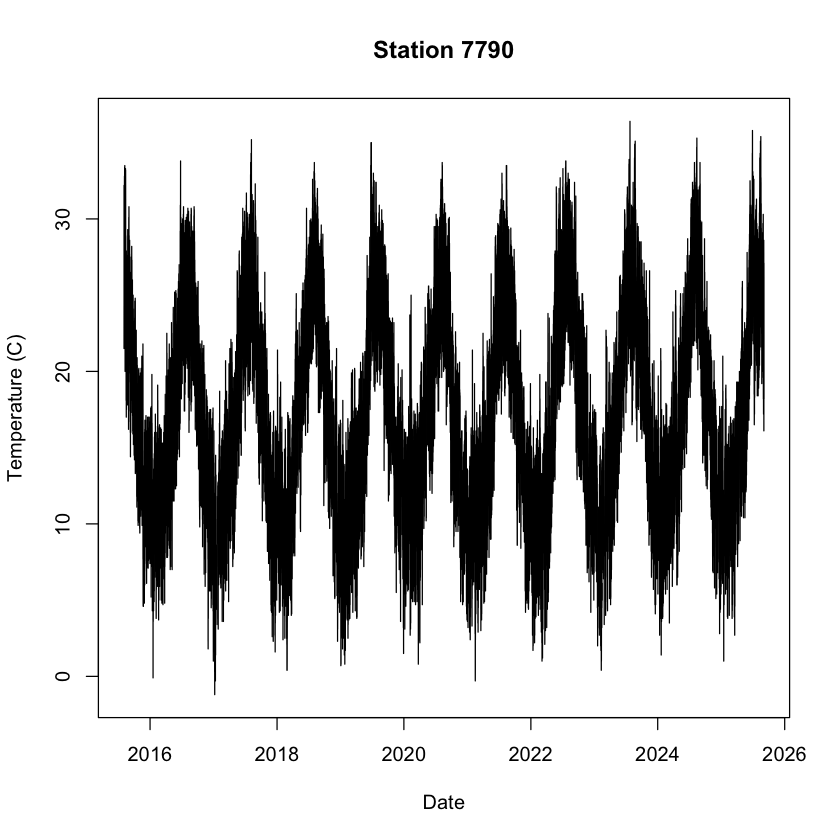

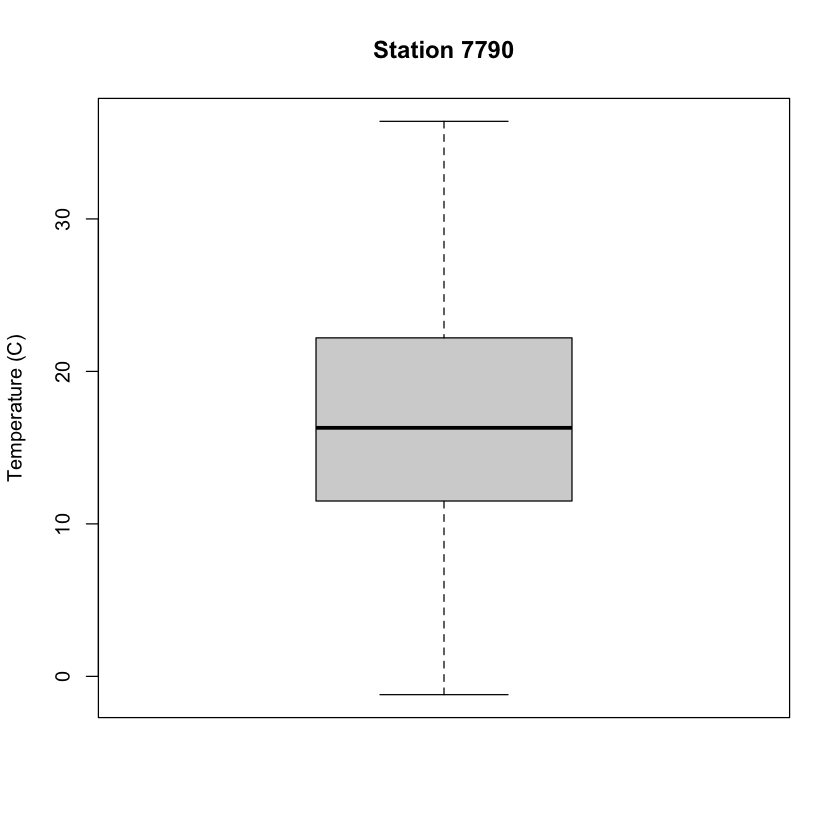

In [111]:
# Only looking at station 7790 for example
library(lubridate)
temperature_data_C_7790 <- temperature_data_C[temperature_data_C$ID.OMM.station == 7790,]
pressure_data_7790 <- pressure_data[pressure_data$ID.OMM.station == 7790,]

# Conversion of the date format & checking that the steps (3, 6, 9, 12, 27 hours)
temperature_data_C_7790$DateTime <- ymd_hms(temperature_data_C_7790$Date)
pressure_data_7790$DateTime <- ymd_hms(pressure_data_7790$Date)
diffs <- as.numeric(diff(temperature_data_C_7790$DateTime), units = "hours")
unique(diffs)
head(temperature_data_C_7790)
head(pressure_data_7790)

par(bg = "white")
plot(temperature_data_C_7790$DateTime, 
    temperature_data_C_7790$`Température...C.`, 
    type = "l",
    xlab = "Date", 
    ylab = "Temperature (C)", 
    main = "Station 7790")

boxplot(temperature_data_C_7790$`Température...C.`, 
    ylab = "Temperature (C)", 
    main = "Station 7790")

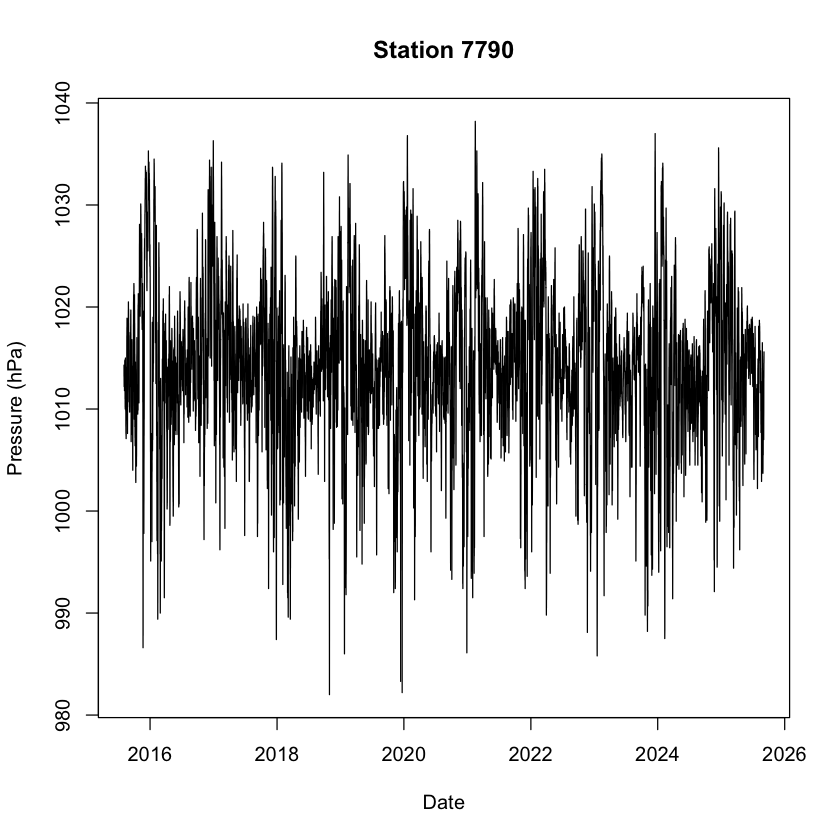

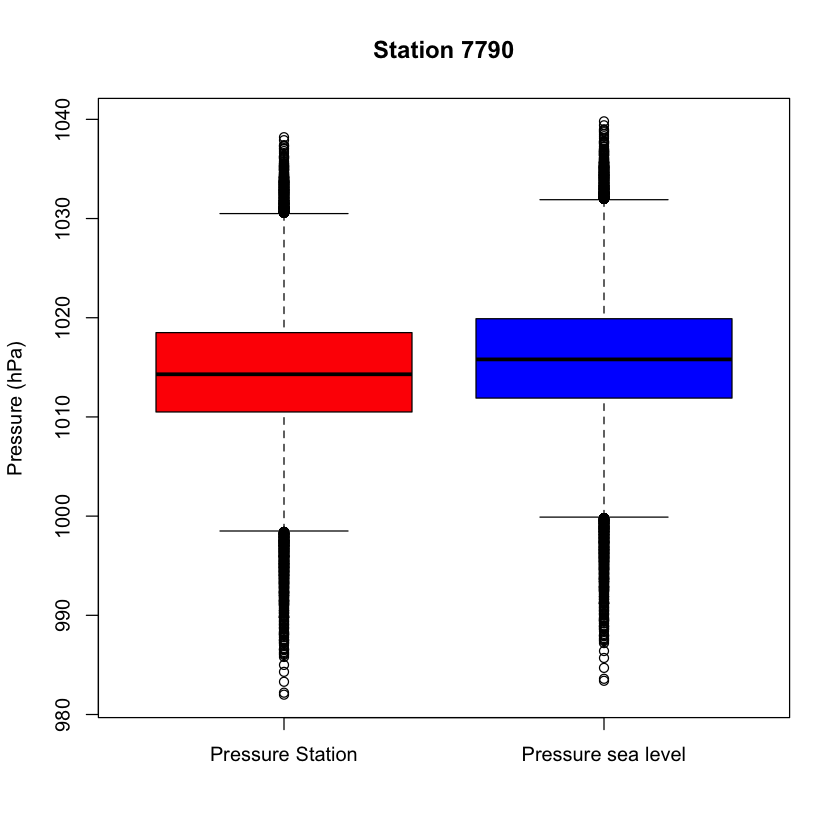

In [110]:
par(bg = "white")
plot(pressure_data_7790$DateTime, 
    pressure_data_7790$Pression.station/100, 
    type = "l",
    xlab = "Date", 
    ylab = "Pressure (hPa)", 
    main = "Station 7790")

boxplot(pressure_data_7790$Pression.station/100, 
    pressure_data_7790$Pression.au.niveau.mer/100,
    names = c("Pressure Station", "Pressure sea level"),
    col = c("red", "blue"),
    ylab = "Pressure (hPa)", 
    main = "Station 7790")